# <p style="background-color:#000000;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Customer Segmentation</p>


**Problem Statement**

* Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

* Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

<a id="1"></a>
## <p style="background-color:#000000;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>

https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering/notebook#CONCLUSION

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from datetime import datetime
import time
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
# Establecer el estilo dark_background
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
## <p style="background-color:#000000;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">1. LOADING DATA</p>

* People

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise

* Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years

* Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

* Place

NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

In [2]:
people_data = {
    'Attribute': ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 
                  'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain'],
    'Description': ["Customer's unique identifier", "Customer's birth year",
                    "Customer's education level", "Customer's marital status",
                    "Customer's yearly household income",
                    "Number of children in customer's household",
                    "Number of teenagers in customer's household",
                    "Date of customer's enrollment with the company",
                    "Number of days since customer's last purchase",
                    "1 if the customer complained in the last 2 years, 0 otherwise"]
}
people_df = pd.DataFrame(people_data)
people_df

Attribute                                        Description
0              ID                       Customer's unique identifier
1      Year_Birth                              Customer's birth year
2       Education                         Customer's education level
3  Marital_Status                          Customer's marital status
4          Income                 Customer's yearly household income
5         Kidhome         Number of children in customer's household
6        Teenhome        Number of teenagers in customer's household
7     Dt_Customer     Date of customer's enrollment with the company
8         Recency      Number of days since customer's last purchase
9        Complain  1 if the customer complained in the last 2 yea...

In [3]:
products_data = {
    'Attribute': ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                  'MntSweetProducts', 'MntGoldProds'],
    'Description': ["Amount spent on wine in last 2 years",
                    "Amount spent on fruits in last 2 years",
                    "Amount spent on meat in last 2 years",
                    "Amount spent on fish in last 2 years",
                    "Amount spent on sweets in last 2 years",
                    "Amount spent on gold in last 2 years"]
}
products_df = pd.DataFrame(products_data)
products_df

Attribute                             Description
0          MntWines    Amount spent on wine in last 2 years
1         MntFruits  Amount spent on fruits in last 2 years
2   MntMeatProducts    Amount spent on meat in last 2 years
3   MntFishProducts    Amount spent on fish in last 2 years
4  MntSweetProducts  Amount spent on sweets in last 2 years
5      MntGoldProds    Amount spent on gold in last 2 years

In [4]:
promotion_data = {
    'Attribute': ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                  'AcceptedCmp4', 'AcceptedCmp5', 'Response'],
    'Description': ["Number of purchases made with a discount",
                    "1 if customer accepted the offer in the 1st campaign, 0 otherwise",
                    "1 if customer accepted the offer in the 2nd campaign, 0 otherwise",
                    "1 if customer accepted the offer in the 3rd campaign, 0 otherwise",
                    "1 if customer accepted the offer in the 4th campaign, 0 otherwise",
                    "1 if customer accepted the offer in the 5th campaign, 0 otherwise",
                    "1 if customer accepted the offer in the last campaign, 0 otherwise"]
}
promotion_df = pd.DataFrame(promotion_data)
promotion_df

Attribute                                        Description
0  NumDealsPurchases           Number of purchases made with a discount
1       AcceptedCmp1  1 if customer accepted the offer in the 1st ca...
2       AcceptedCmp2  1 if customer accepted the offer in the 2nd ca...
3       AcceptedCmp3  1 if customer accepted the offer in the 3rd ca...
4       AcceptedCmp4  1 if customer accepted the offer in the 4th ca...
5       AcceptedCmp5  1 if customer accepted the offer in the 5th ca...
6           Response  1 if customer accepted the offer in the last c...

In [5]:
place_data = {
    'Attribute': ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
    'Description': ["Number of purchases made through the company’s website",
                    "Number of purchases made using a catalogue",
                    "Number of purchases made directly in stores",
                    "Number of visits to company’s website in the last month"]
}
place_df = pd.DataFrame(place_data)
place_df

Attribute                                        Description
0      NumWebPurchases  Number of purchases made through the company’s...
1  NumCatalogPurchases         Number of purchases made using a catalogue
2    NumStorePurchases        Number of purchases made directly in stores
3    NumWebVisitsMonth  Number of visits to company’s website in the l...

In [6]:
url = 'marketing_campaign.csv'
df = pd.read_csv(url, sep='\t')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [7]:
print("El número de filas es ", df.shape[0])
print("El número de columnas es ", df.shape[1])

El número de filas es  2240
El número de columnas es  29


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<a id="2"></a>
## <p style="background-color:#000000;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">2. DATA CLEANING</p>

In [9]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [10]:
print("The newest customer's enrolment data in  the records : ",max(df['Dt_Customer']))
print("The oldest customer's enrolment data in the records : ", min(df['Dt_Customer']))

The newest customer's enrolment data in  the records :  2014-06-29 00:00:00
The oldest customer's enrolment data in the records :  2012-07-30 00:00:00


In [11]:
dt_max=max(df['Dt_Customer'])
df['Customer_For']=dt_max-df['Dt_Customer']
df['Customer_For'].head()

0   663 days
1   113 days
2   312 days
3   139 days
4   161 days
Name: Customer_For, dtype: timedelta64[ns]

In [12]:
df[['Dt_Customer','Income','Customer_For']]

Dt_Customer   Income Customer_For
0     2012-09-04  58138.0     663 days
1     2014-03-08  46344.0     113 days
2     2013-08-21  71613.0     312 days
3     2014-02-10  26646.0     139 days
4     2014-01-19  58293.0     161 days
...          ...      ...          ...
2235  2013-06-13  61223.0     381 days
2236  2014-06-10  64014.0      19 days
2237  2014-01-25  56981.0     155 days
2238  2014-01-24  69245.0     156 days
2239  2012-10-15  52869.0     622 days

[2240 rows x 3 columns]

In [13]:
cat=df.select_dtypes(include='object').columns
print(f"Las columnas categoricas son : ",cat)
df[cat].nunique()

Las columnas categoricas son :  Index(['Education', 'Marital_Status'], dtype='object')


Education         5
Marital_Status    8
dtype: int64

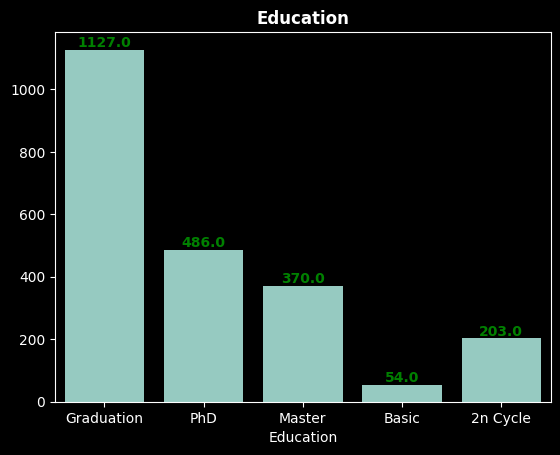

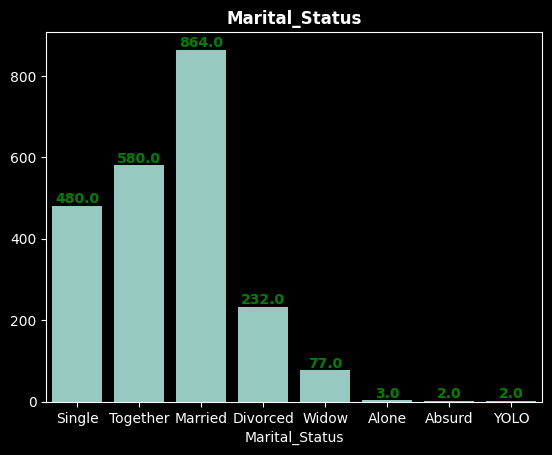

In [14]:
# Supongamos que 'cat' contiene las columnas categóricas que quieres graficar

for i in cat:
    # Generar el gráfico de barras
    sns.countplot(data=df, x=i)
    plt.title(i, fontsize=12, weight='bold')
    plt.ylabel('')
    
    # Agregar etiquetas a las barras
    ax = plt.gca()  # Obtener el eje actual
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='green',weight='bold', xytext=(0, 5), 
                    textcoords='offset points')

    plt.show()




* In the first graph of bars, the most consumers are graduation
* In the Second graph of bars , the most consumers are married

In [15]:
print(df.isnull().sum())
print('---------------------------------------')
print(f'Total de vacios :',df.isnull().sum().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Customer_For            0
dtype: int64
---------------------------------------
Total de vacios : 24


<Axes: >

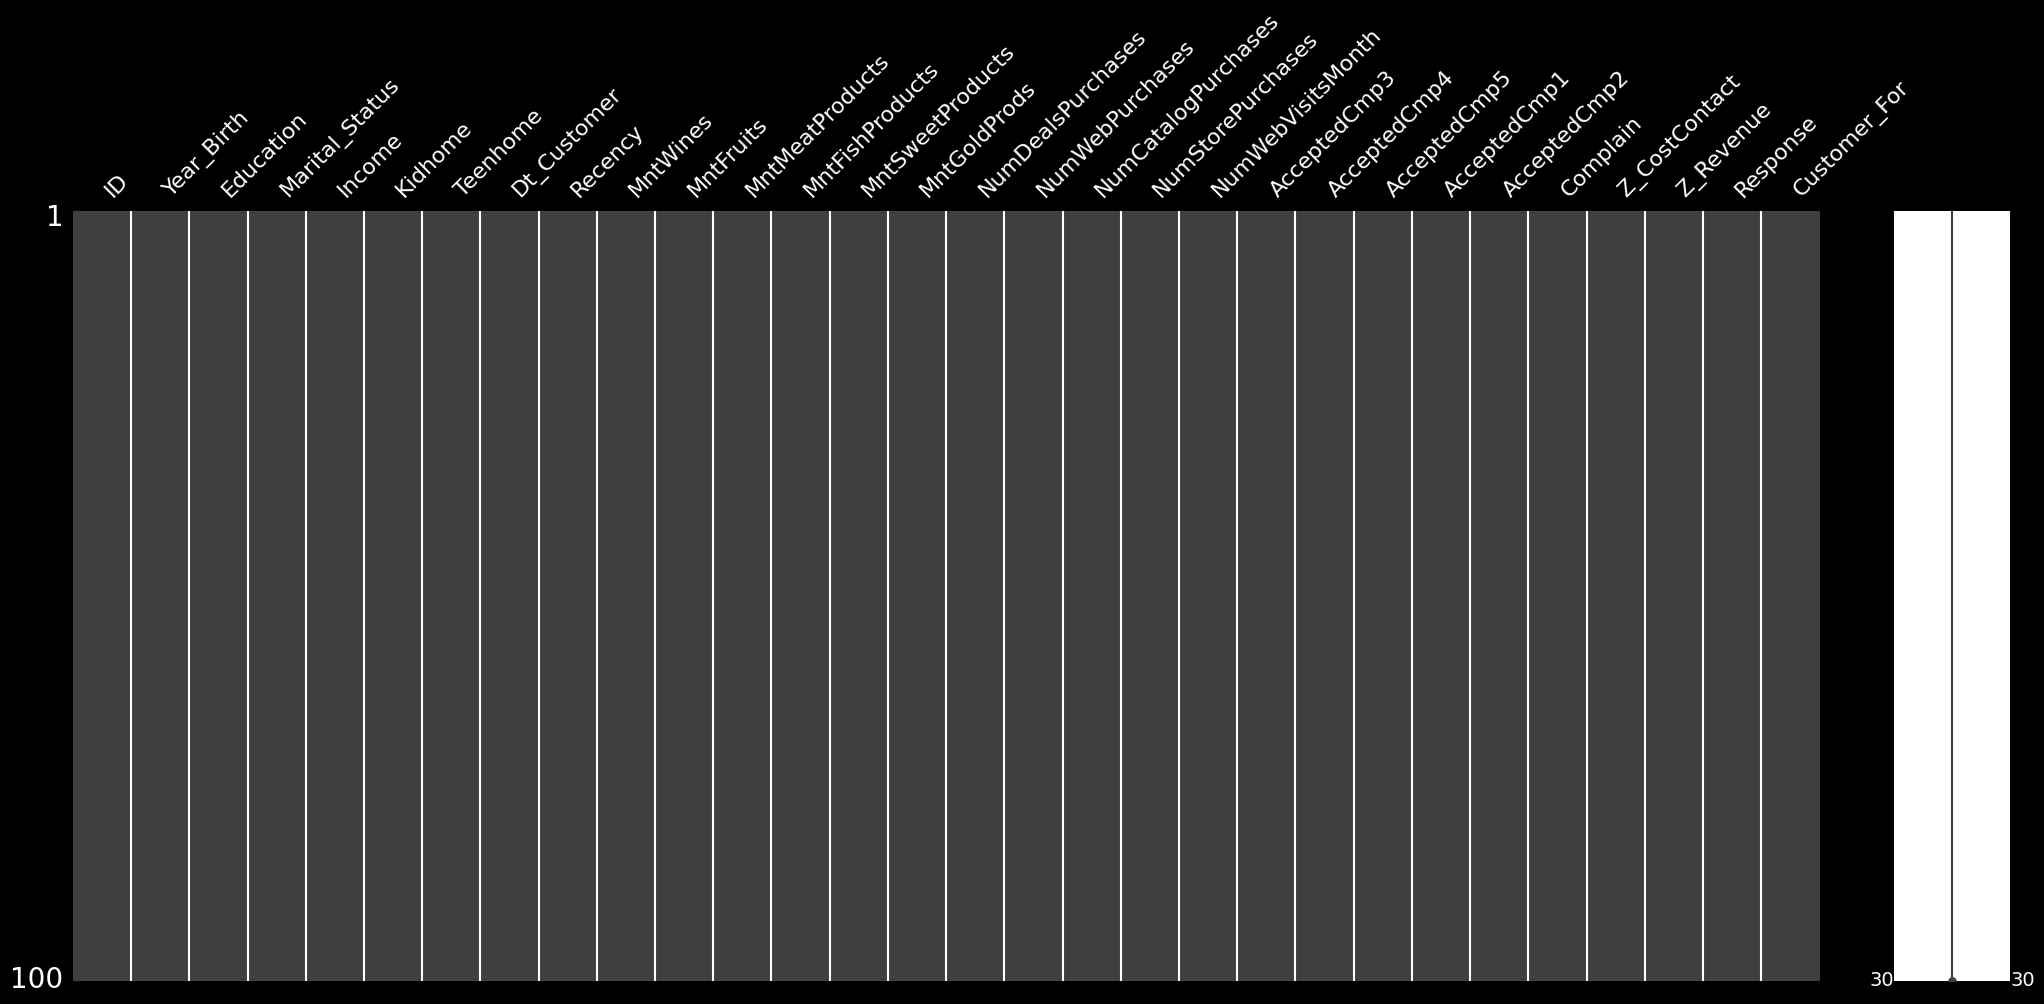

In [16]:
msno.matrix(df.sample(100))

<Axes: >

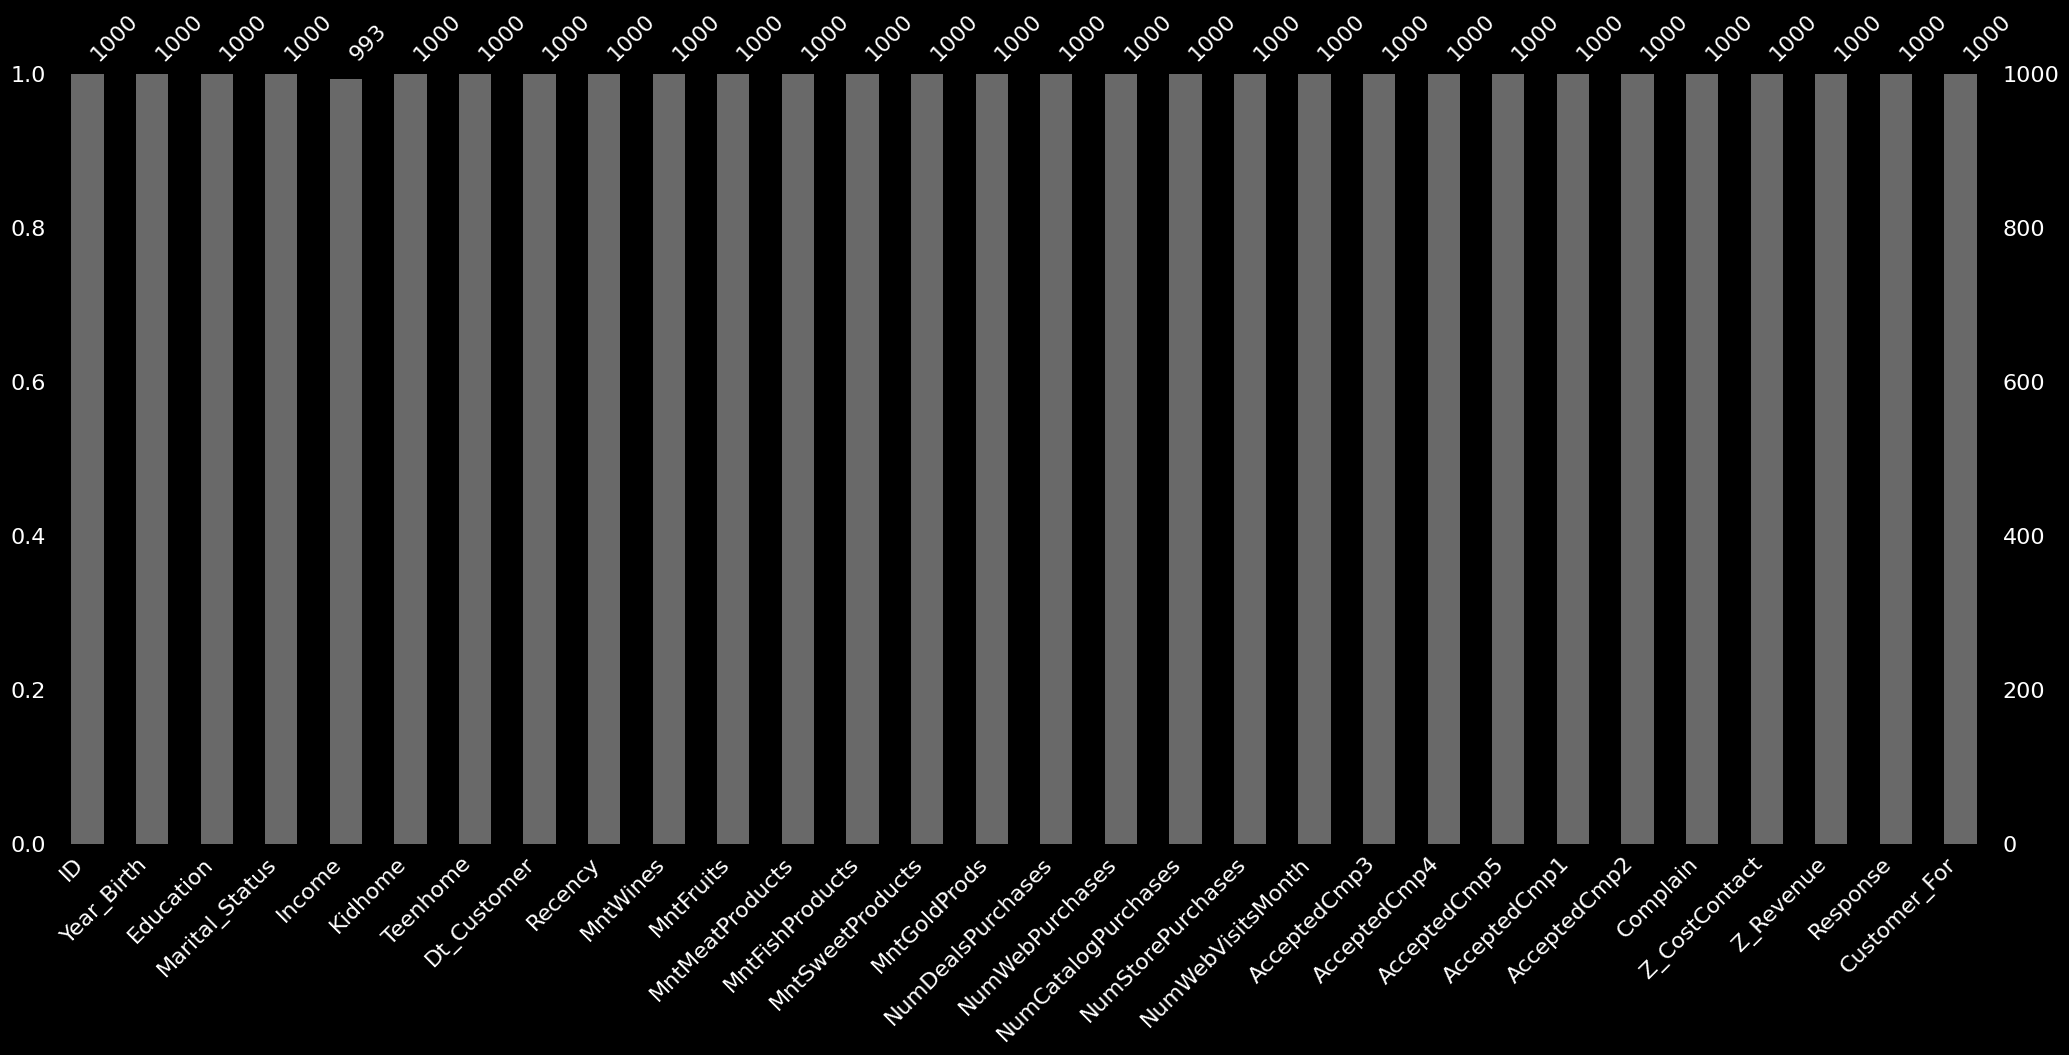

In [17]:
msno.bar(df.sample(1000))

<Axes: >

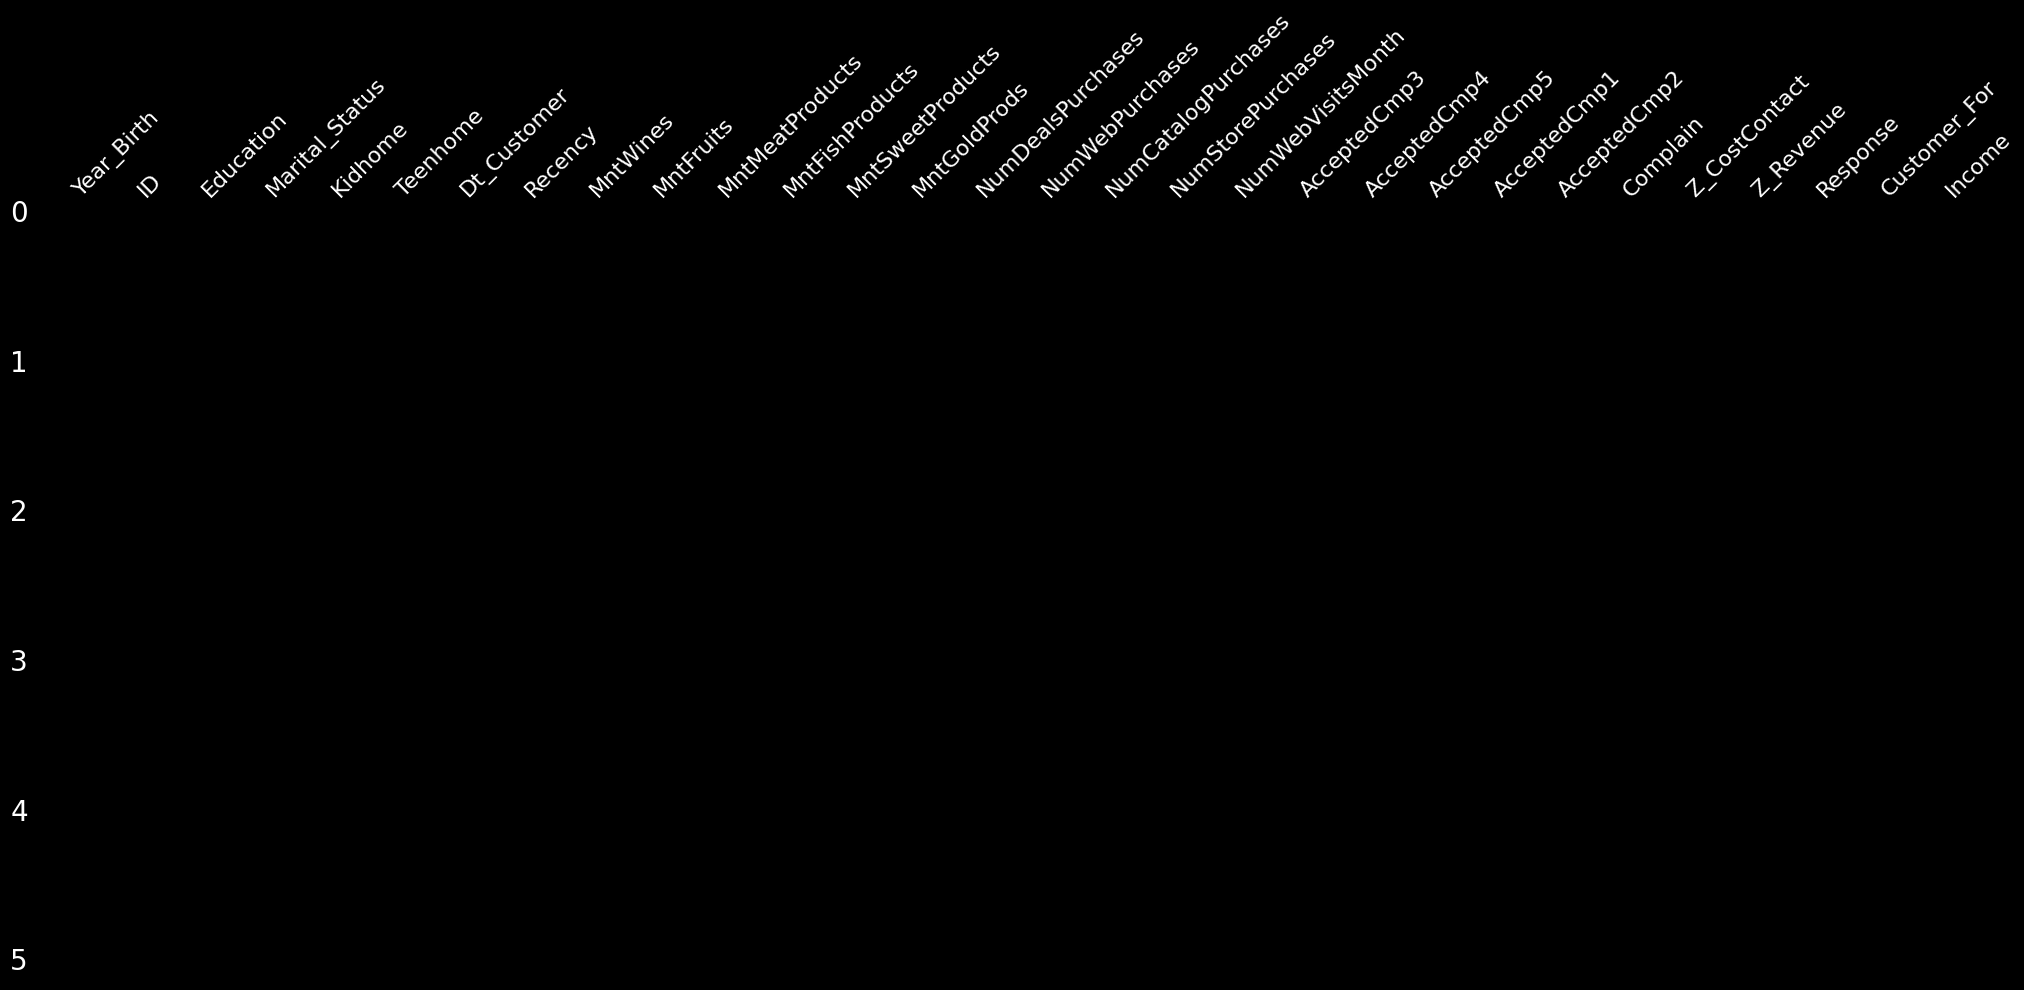

In [18]:
msno.dendrogram(df)

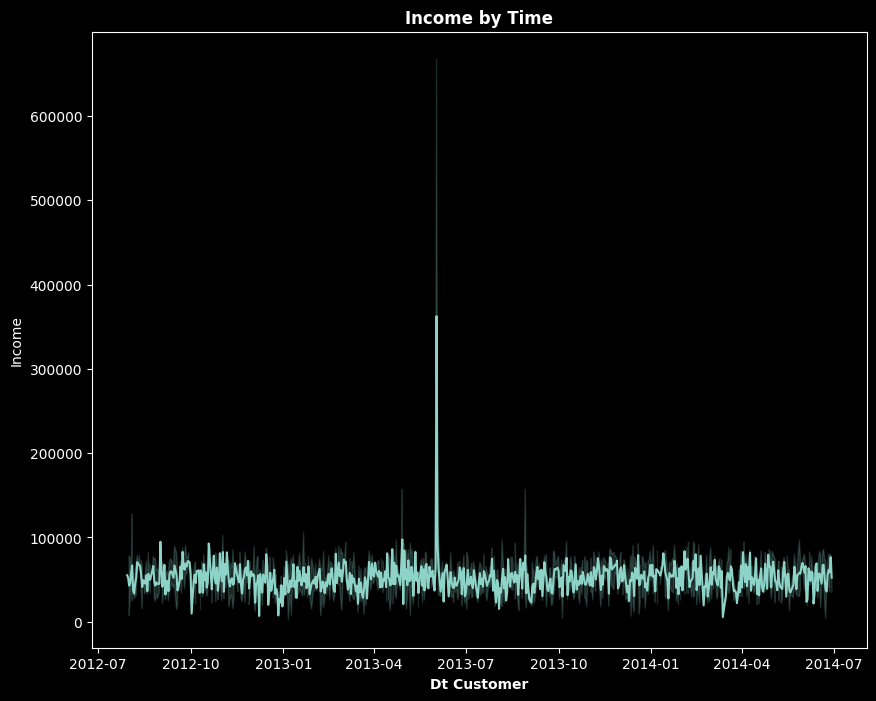

In [19]:
# puedo predecir los income
plt.figure(figsize=(10,8)) 
sns.lineplot(data=df,x='Dt_Customer',y='Income')
plt.title('Income by Time',fontsize=12,weight='bold')
plt.xlabel('Dt Customer',weight='bold')
plt.show()

In [20]:
nulos_en_income = df[df['Income'].isnull()]
nulos_en_income

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
10    2013-11-15       11         5  ...             0             0   
27    2013-02-20       19         5  ...             0             0   
43    2013-11-05       80        81  ...             0             0   
48    2014-01-01       96        48  ...             0             0   
58    2013-06-17       57        11  ...             0             0   
71    2012-09-14       25        25  ...             0             0   
90    2012-11-19        4       230  ...             0             0   
91    2014-05-27       45         7  ...             0             0   
92    2013-11-23       87       445  ...             0             0   
128   2013-07-11       23       352  ...             0             0   
133   2013-08-11       96       231  ...             0             0   
312   2013-06-03       69       861  ...             0             1   
319   2013-08-23       67       738  ...             0             1   
1379  2013-04-01       39       187  ...             0             0   
1382  2012-09-03       87        19  ...             0             0   
1383  2014-01-12       49         5  ...             0             0   
1386  2014-03-02       17        25  ...             0             0   
2059  2013-05-18       52       375  ...             0             0   
2061  2013-05-31       82        23  ...             0             0   
2078  2013-03-03       82        71  ...             0             0   
2079  2013-06-23       83       161  ...             0             0   
2081  2013-10-18       95       264  ...             0             0   
2084  2013-10-30       75       532  ...             0             0   
2228  2012-08-12       53        32  ...             0             1   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
10               0             0             0         0              3   
27               0             0

In [21]:
print("The total number of data-points after removing the rows with missing values are:", len(df))
df=df.dropna()
print("The total of row and columns is ", df.shape)

The total number of data-points after removing the rows with missing values are: 2240
The total of row and columns is  (2216, 30)


In [22]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_For'],
      dtype='object')

In [23]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [24]:
print(df['Kidhome'].value_counts())
print(df['Teenhome'].value_counts())

Kidhome
0    1283
1     887
2      46
Name: count, dtype: int64
Teenhome
0    1147
1    1018
2      51
Name: count, dtype: int64


In [25]:
año_actual=datetime.now().year
# Age of Customers
df['Age']=año_actual-df['Year_Birth']
df['spent']=df['MntWines']+ df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
#Deriving living situation by marital status"Alone"
df['Living_With']=df['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", 
                                                "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})
# Total children
df['Children']=df['Kidhome']+df['Teenhome']
# Feature  for total members in the householde
df['Family_Size']=df['Living_With'].replace({"Alone": 1, "Partner":2}) + df['Children']
# Feature pertaining  parenthood
df['Is_Parent']=np.where(df['Children']>0,1,0)
# Segmenting education levels
df['Education']=df['Education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate",
                                         "Graduation":"Graduate", "Master":"Postgraduate", 
                                         "PhD":"Postgraduate"})

# For clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                      "MntFishProducts":"Fish","MntSweetProducts":"Sweets"
                      ,"MntGoldProds":"Gold"})

In [26]:
# Dropping some of product redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df[to_drop].head()

Marital_Status Dt_Customer  Z_CostContact  Z_Revenue  Year_Birth    ID
0         Single  2012-09-04              3         11        1957  5524
1         Single  2014-03-08              3         11        1954  2174
2       Together  2013-08-21              3         11        1965  4141
3       Together  2014-02-10              3         11        1984  6182
4        Married  2014-01-19              3         11        1981  5324

In [27]:
df=df.drop(to_drop,axis=1)
print(df.columns)

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Education            2216 non-null   object         
 1   Income               2216 non-null   float64        
 2   Kidhome              2216 non-null   int64          
 3   Teenhome             2216 non-null   int64          
 4   Recency              2216 non-null   int64          
 5   Wines                2216 non-null   int64          
 6   Fruits               2216 non-null   int64          
 7   Meat                 2216 non-null   int64          
 8   Fish                 2216 non-null   int64          
 9   Sweets               2216 non-null   int64          
 10  Gold                 2216 non-null   int64          
 11  NumDealsPurchases    2216 non-null   int64          
 12  NumWebPurchases      2216 non-null   int64          
 13  NumCatalogPurchases  22

In [29]:
df.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2216.000000   2216.000000  2216.000000  2216.000000   
mean       0.064079      0.013538     0.009477     0.150271   
std        0.244950      0.115588     0.096907     0.357417   
min        0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000     1.000000     1.000000   

                      Customer_For          Age        spent     Children  \
count                         2216  2216.000000  2216.000000  2216.000000   
mean   353 days 12:30:32.490974728    55.179603   607.075361     0.947202   
std    202 days 10:25:55.267301594    11.985554   602.900476     0.749062   
min                0 days 00:00:00    28.000000     5.000000     0.000000   
25%              180 days 00:00:00    47.000000    69.000000     0.000000   
50%              355 days 12:00:00    54.000000   396.500000     1.000000   
75%              529 days 00:00:00    65.000000  1048.000000     1.000000   
max              699 days 00:00:00   131.000000  2525.000000     3.000000   

       Family_Size    Is_Parent  
count  2216.000000  2216.000000  
mean      2.592509     0.714350  
std       0.905722     0.451825  
min       1.000000     0.000000  
25%       2.000000     0.000000  
50%       3.000000     1.000000  
75%       3.000000     1.000000  
max       5.000000     1.000000  

[8 rows x 28 columns]

In [30]:
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "spent", "Is_Parent"]
df[To_Plot].describe()

Income      Recency                 Customer_For          Age  \
count    2216.000000  2216.000000                         2216  2216.000000   
mean    52247.251354    49.012635  353 days 12:30:32.490974728    55.179603   
std     25173.076661    28.948352  202 days 10:25:55.267301594    11.985554   
min      1730.000000     0.000000              0 days 00:00:00    28.000000   
25%     35303.000000    24.000000            180 days 00:00:00    47.000000   
50%     51381.500000    49.000000            355 days 12:00:00    54.000000   
75%     68522.000000    74.000000            529 days 00:00:00    65.000000   
max    666666.000000    99.000000            699 days 00:00:00   131.000000   

             spent    Is_Parent  
count  2216.000000  2216.000000  
mean    607.075361     0.714350  
std     602.900476     0.451825  
min       5.000000     0.000000  
25%      69.000000     0.000000  
50%     396.500000     1.000000  
75%    1048.000000     1.000000  
max    2525.000000     1.000000

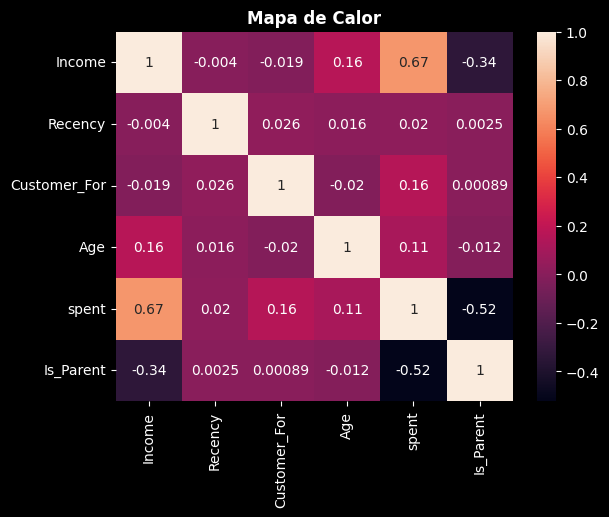

In [31]:
# Establecer el estilo dark_background
plt.style.use('dark_background')
sns.heatmap(df[To_Plot].corr(),annot=True)
plt.title('Mapa de Calor', weight='bold',fontsize=12)
plt.show()

<Figure size 1000x800 with 0 Axes>

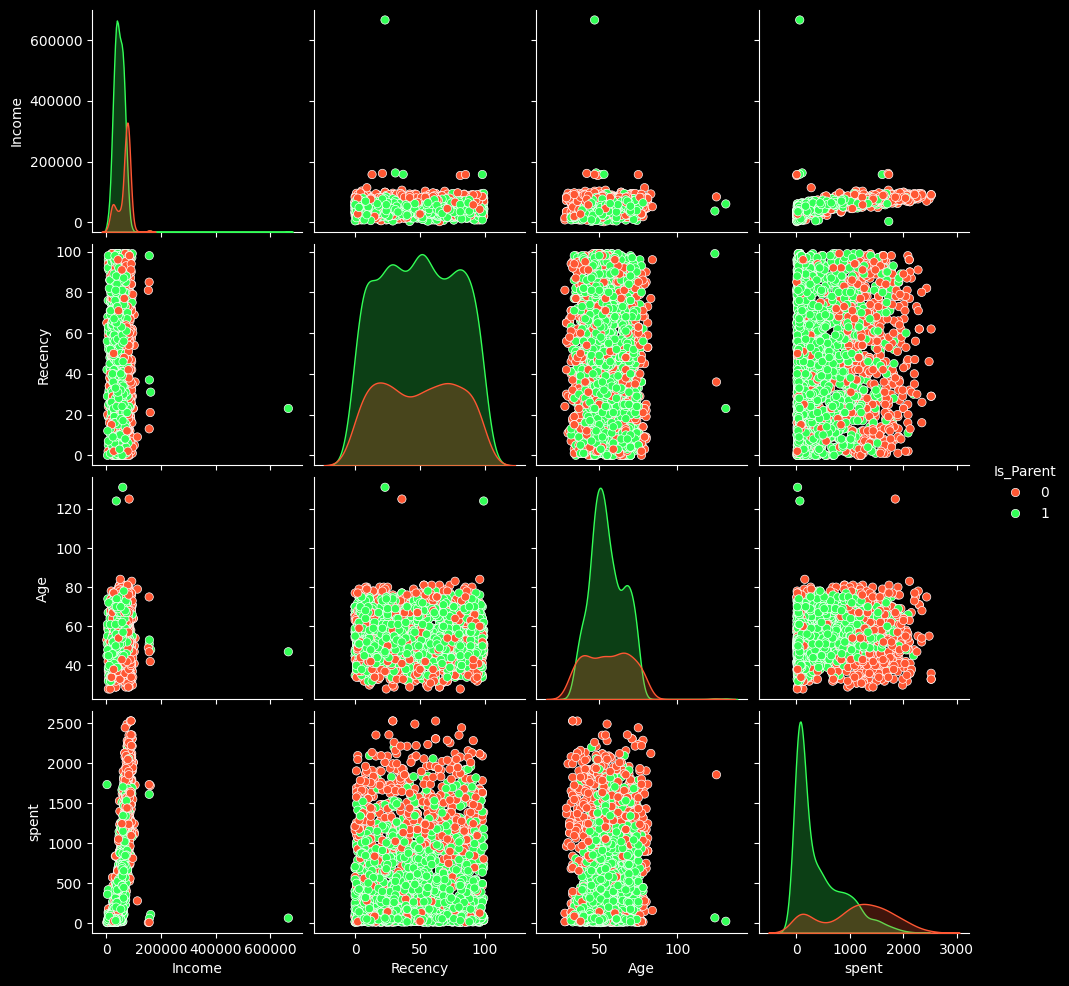

In [32]:
# Establecer el estilo dark_background
plt.style.use('dark_background')
# Colores sugeridos que combinan bien con el fondo oscuro
colors = ["#FF5733", "#33FF57", "#5733FF", "#FF33D6", "#33D6FF"]

# Crear el pairplot con los colores sugeridos
plt.figure(figsize=(10, 8))
sns.pairplot(df[To_Plot], hue="Is_Parent", palette=colors)
plt.show()

In [33]:
print(f'the age max of customers :', max(df['Age']))
print(f'The number of rows and columns is ',df.shape)
# Dropping the outliers by setting a cap on Age
df=df[(df['Age']<90)]
print(f'The number of rows and columns is ',df.shape)

the age max of customers : 131
The number of rows and columns is  (2216, 30)
The number of rows and columns is  (2213, 30)


In [34]:
print(f'The max of Income is ',max(df['Income']))
print(f'The min of Income is ',min(df['Income']))

The max of Income is  666666.0
The min of Income is  1730.0


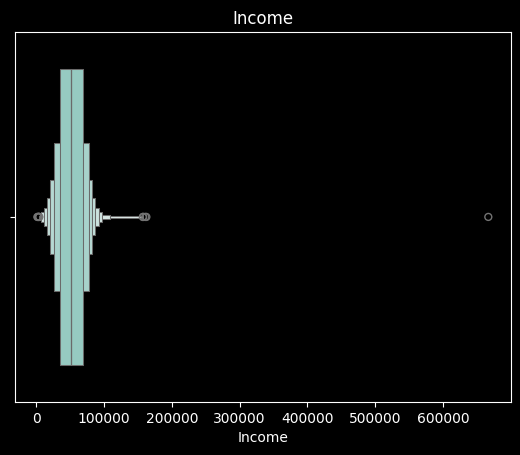

In [35]:
sns.boxenplot(data=df,x='Income')
plt.title('Income',fontsize=12)
plt.show()

In [36]:
df=df[(df['Income']<600000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2212


In [37]:
df.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0      Graduate  58138.0        0         0       58    635      88   546   
1      Graduate  46344.0        1         1       38     11       1     6   
2      Graduate  71613.0        0         0       26    426      49   127   
3      Graduate  26646.0        1         0       26     11       4    20   
4  Postgraduate  58293.0        1         0       94    173      43   118   

   Fish  Sweets  ...  AcceptedCmp2  Complain  Response  Customer_For  Age  \
0   172      88  ...             0         0         1      663 days   67   
1     2       1  ...             0         0         0      113 days   70   
2   111      21  ...             0         0         0      312 days   59   
3    10       3  ...             0         0         0      139 days   40   
4    46      27  ...             0         0         0      161 days   43   

   spent  Living_With  Children  Family_Size  Is_Parent  
0   1617        Alone         0            1          0  
1     27        Alone         2            3          1  
2    776      Partner         0            2          0  
3     53      Partner         1            3          1  
4    422      Partner         1            3          1  

[5 rows x 30 columns]

In [38]:
cat=df.select_dtypes(include='object').columns
print("the columns categoric are ",cat)

the columns categoric are  Index(['Education', 'Living_With'], dtype='object')


Education
Graduate         1115
Postgraduate      845
Undergraduate     252
Name: count, dtype: int64


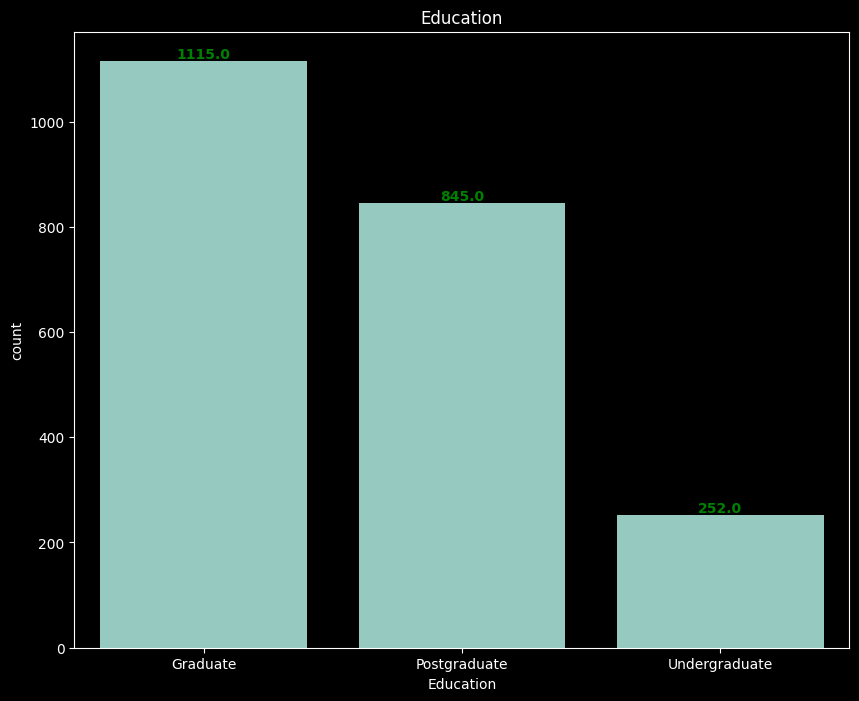

In [39]:
print(df['Education'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Education')
plt.title('Education',fontsize=12)
# Agregar etiquetas a las barras
ax = plt.gca()  # Obtener el eje actual
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='green',weight='bold', xytext=(0, 5), 
                textcoords='offset points')

plt.show()

Living_With
Partner    1428
Alone       784
Name: count, dtype: int64


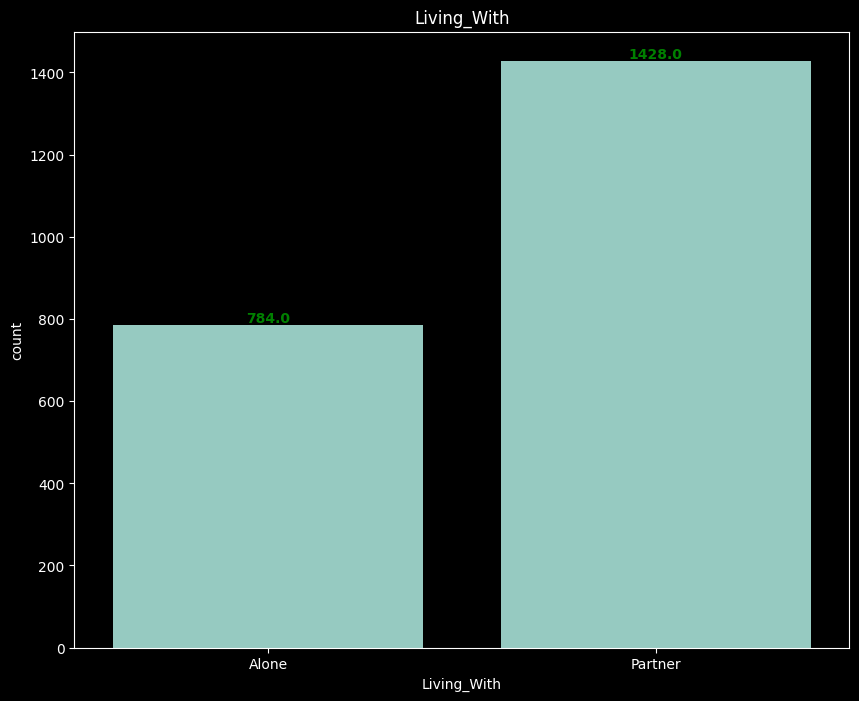

In [40]:
print(df['Living_With'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Living_With')
plt.title('Living_With')
# Agregar etiquetas a las barras
ax = plt.gca()  # Obtener el eje actual
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='green',weight='bold', xytext=(0, 5), 
                textcoords='offset points')

plt.show()

In [41]:
df.columns
num=['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'spent','Children', 'Family_Size', 'Is_Parent']

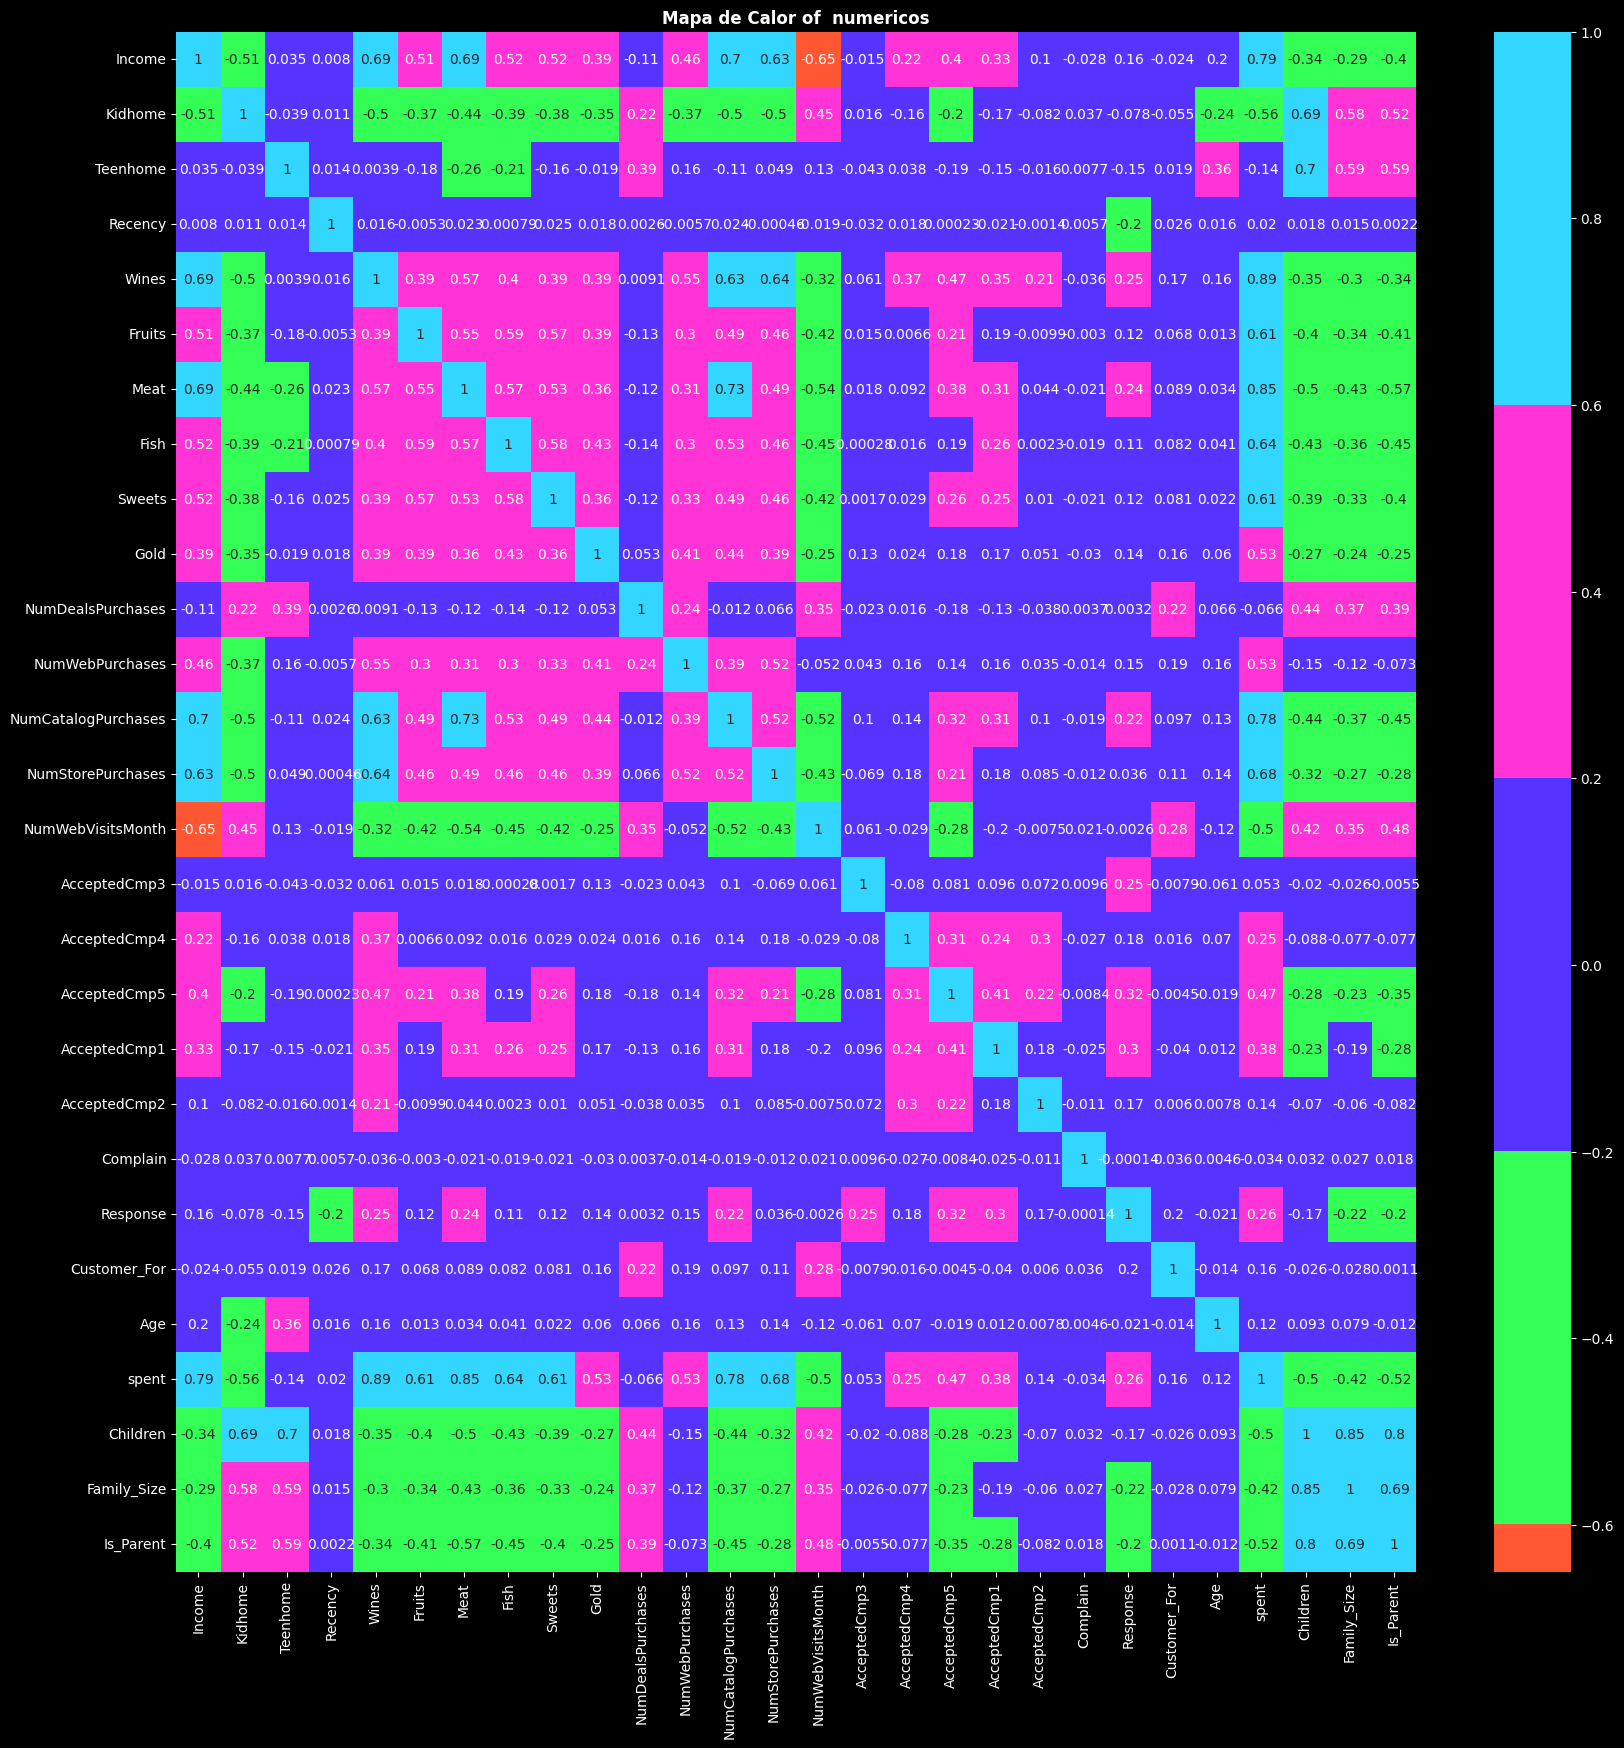

In [42]:
corrmat=df[num].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True,cmap=colors,center=0)
plt.title('Mapa de Calor of  numericos',fontsize=12,weight='bold')
plt.show()

In [45]:
cat
le=LabelEncoder()
for i in cat:
    df[i]=df[[i]].apply(le.fit_transform)
df[cat].head()

Education  Living_With
0          0            0
1          0            0
2          0            1
3          0            1
4          1            1

In [52]:
df_new=df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df_new.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  AcceptedCmp2  Complain  Response  Customer_For  Age  spent  \
0      88  ...             0         0         1      663 days   67   1617   
1       1  ...             0         0         0      113 days   70     27   
2      21  ...             0         0         0      312 days   59    776   
3       3  ...             0         0         0      139 days   40     53   
4      27  ...             0         0         0      161 days   43    422   

   Living_With  Children  Family_Size  Is_Parent  
0            0         0            1          0  
1            0         2            3          1  
2            1         0            2          0  
3            1         1            3          1  
4            1         1            3          1  

[5 rows x 30 columns]

In [53]:
df_new=df_new.drop(cols_del,axis=1)
df_new.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0      88  ...                   10                  4                  7   
1       1  ...                    1                  2                  5   
2      21  ...                    2                 10                  4   
3       3  ...                    0                  4                  6   
4      27  ...                    3                  6                  5   

   Customer_For  Age  spent Living_With  Children  Family_Size  Is_Parent  
0      663 days   67   1617           0         0            1          0  
1      113 days   70     27           0         2            3          1  
2      312 days   59    776           1         0            2          0  
3      139 days   40     53           1         1            3          1  
4      161 days   43    422           1         1            3          1  

[5 rows x 23 columns]

In [56]:
df_new['Customer_For'] = pd.to_timedelta(df_new['Customer_For'])
# Extraer el número de días como un número entero
df_new['Customer_For'] = df_new['Customer_For'].dt.days
df_new['Customer_For'].info()

<class 'pandas.core.series.Series'>
Index: 2212 entries, 0 to 2239
Series name: Customer_For
Non-Null Count  Dtype
--------------  -----
2212 non-null   int64
dtypes: int64(1)
memory usage: 34.6 KB


In [58]:
scaler=StandardScaler()
scaler.fit(df_new)
scaler_df_new=pd.DataFrame(scaler.transform(df_new),columns=df_new.columns)
scaler_df_new.head()

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     spent  Living_With  Children  \
0           0.692181      1.527721  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545     -1.189011  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908     -0.206048  0.334530  0.280110     0.740959 -1.264598   
3           0.279818     -1.060584 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545     -0.951915 -1.033114 -0.307562     0.740959  0.069987   

   Family_Size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 23 columns]

In [59]:
scaler_df_new.describe()

Education        Income       Kidhome      Teenhome       Recency  \
count  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03   
mean   1.445498e-17 -1.252765e-16  4.175884e-17  9.636656e-17  4.015273e-18   
std    1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00   
min   -8.935862e-01 -2.333791e+00 -8.227535e-01 -9.296987e-01 -1.694030e+00   
25%   -8.935862e-01 -7.771113e-01 -8.227535e-01 -9.296987e-01 -8.646302e-01   
50%   -8.935862e-01 -2.731156e-02 -8.227535e-01 -9.296987e-01 -6.717941e-04   
75%    5.716567e-01  7.679525e-01  1.040021e+00  9.080971e-01  8.632866e-01   
max    2.036900e+00  5.131311e+00  2.902796e+00  2.745893e+00  1.727245e+00   

              Wines        Fruits          Meat          Fish        Sweets  \
count  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03   
mean   4.898633e-17  1.043971e-17  3.212219e-18 -1.204582e-17  3.212219e-18   
std    1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00   
min   -9.052351e-01 -6.626279e-01 -7.449911e-01 -6.875269e-01 -6.583604e-01   
25%   -8.340705e-01 -6.122946e-01 -6.736275e-01 -6.327421e-01 -6.340186e-01   
50%   -3.848445e-01 -4.612945e-01 -4.416956e-01 -4.683875e-01 -4.636265e-01   
75%    5.921851e-01  1.678727e-01  2.908968e-01  2.255541e-01  1.449170e-01   
max    3.521791e+00  4.345543e+00  6.948902e+00  4.042233e+00  5.719175e+00   

       ...  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count  ...         2.212000e+03       2.212000e+03       2.212000e+03   
mean   ...        -8.672990e-17      -7.107033e-17       1.092154e-16   
std    ...         1.000226e+00       1.000226e+00       1.000226e+00   
min    ...        -9.130004e-01      -1.786506e+00      -2.194360e+00   
25%    ...        -9.130004e-01      -8.634873e-01      -9.572709e-01   
50%    ...        -2.296788e-01      -2.481413e-01       2.798177e-01   
75%    ...         4.536427e-01       6.748776e-01       6.921805e-01   
max    ...         8.653501e+00       2.213242e+00       6.052898e+00   

       Customer_For           Age         spent   Living_With      Children  \
count  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03   
mean  -4.497106e-17  6.183521e-17  5.942604e-17 -2.730386e-17  2.248553e-17   
std    1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00   
min   -1.747176e+00 -2.315280e+00 -9.998189e-01 -1.349603e+00 -1.264598e+00   
25%   -8.580640e-01 -6.912026e-01 -8.935732e-01 -1.349603e+00 -1.264598e+00   
50%    1.129032e-02 -9.285849e-02 -3.490638e-01  7.409586e-01  6.998729e-02   
75%    8.658261e-01  8.473966e-01  7.316544e-01  7.409586e-01  6.998729e-02   
max    1.705543e+00  2.471473e+00  3.183607e+00  7.409586e-01  2.739158e+00   

        Family_Size     Is_Parent  
count  2.212000e+03  2.212000e+03  
mean   2.505530e-16  1.606109e-17  
std    1.000226e+00  1.000226e+00  
min   -1.758359e+00 -1.581139e+00  
25%   -6.546443e-01 -1.581139e+00  
50%    4.490700e-01  6.324555e-01  
75%    4.490700e-01  6.324555e-01  
max    2.656499e+00  6.324555e-01  

[8 rows x 23 columns]

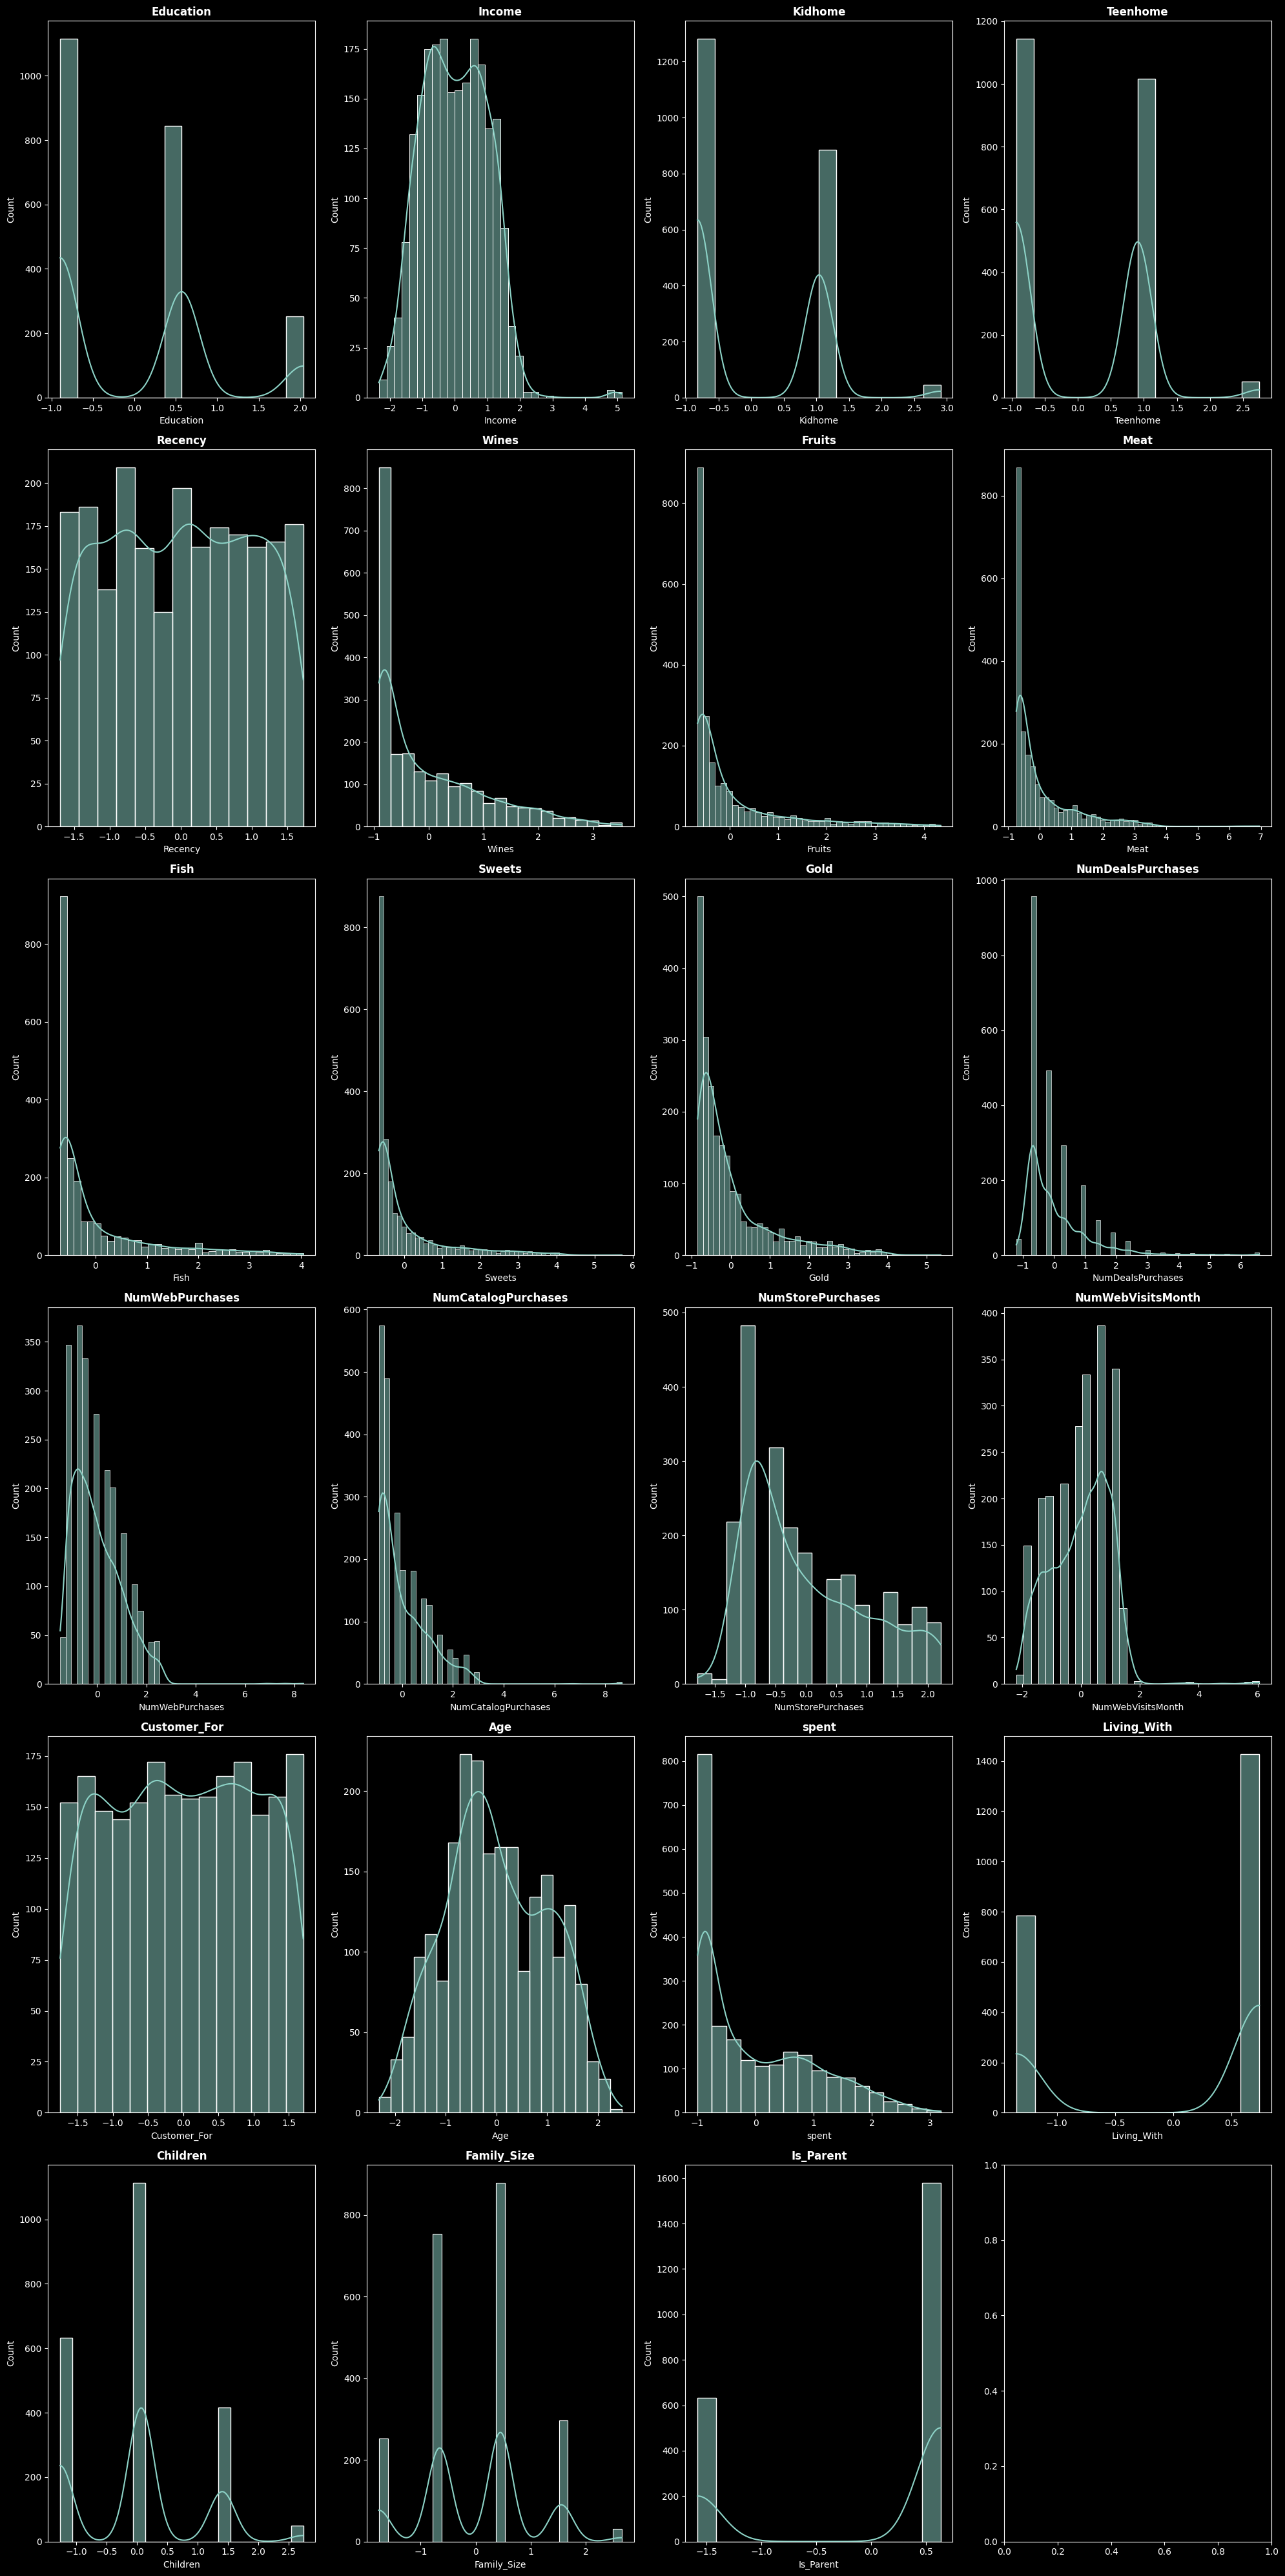

In [67]:
# Calcular el número de filas y columnas necesarias
num_rows = 6
num_cols = 4

# Crear una figura y ejes para los subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))

# Iterar sobre las columnas y agregar un gráfico a cada subgráfico
for idx, col in enumerate(scaler_df_new.columns):
    row_idx = idx // num_cols  # Calcular el índice de fila
    col_idx = idx % num_cols   # Calcular el índice de columna
    ax = axes[row_idx, col_idx]  # Seleccionar el subgráfico correspondiente
    
    # Crear un histograma para la columna actual
    sns.histplot(data=scaler_df_new, x=col, kde=True, ax=ax)
    ax.set_title(col, fontsize=12, weight='bold')  # Establecer el título del subgráfico

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

<a id="2"></a>
## <p style="background-color:#000000;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">3. DATA PREPROCESSING</p>

In [70]:
pca=PCA(n_components=3)
pca.fit(scaler_df_new)
df_pca=pd.DataFrame(pca.transform(scaler_df_new),columns=(['col1','col2','col3']))
df_pca.describe()

col1          col2          col3
count  2.212000e+03  2.212000e+03  2.212000e+03
mean  -4.497106e-17  6.424437e-18  3.212219e-17
std    2.878602e+00  1.709469e+00  1.231686e+00
min   -5.978122e+00 -4.194662e+00 -3.626104e+00
25%   -2.539470e+00 -1.323887e+00 -8.533801e-01
50%   -7.815949e-01 -1.737481e-01 -5.081501e-02
75%    2.386380e+00  1.234935e+00  8.630415e-01
max    7.452915e+00  6.168244e+00  6.756921e+00

In [71]:
df_pca.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -4.497106e-17  2.878602 -5.978122 -2.539470 -0.781595  2.386380   
col2  2212.0  6.424437e-18  1.709469 -4.194662 -1.323887 -0.173748  1.234935   
col3  2212.0  3.212219e-17  1.231686 -3.626104 -0.853380 -0.050815  0.863042   

           max  
col1  7.452915  
col2  6.168244  
col3  6.756921

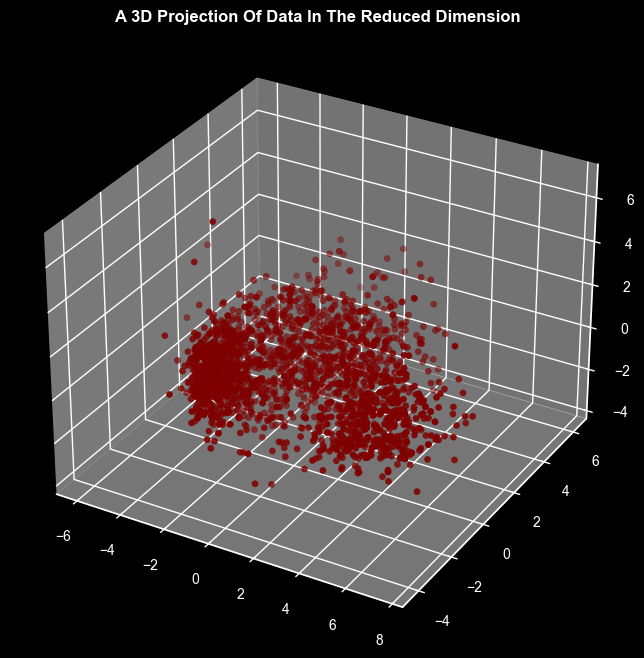

In [75]:
#A 3D Projection Of Data In The Reduced Dimension
x =df_pca["col1"]
y =df_pca["col2"]
z =df_pca["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension",fontsize=12,weight='bold')
plt.show()

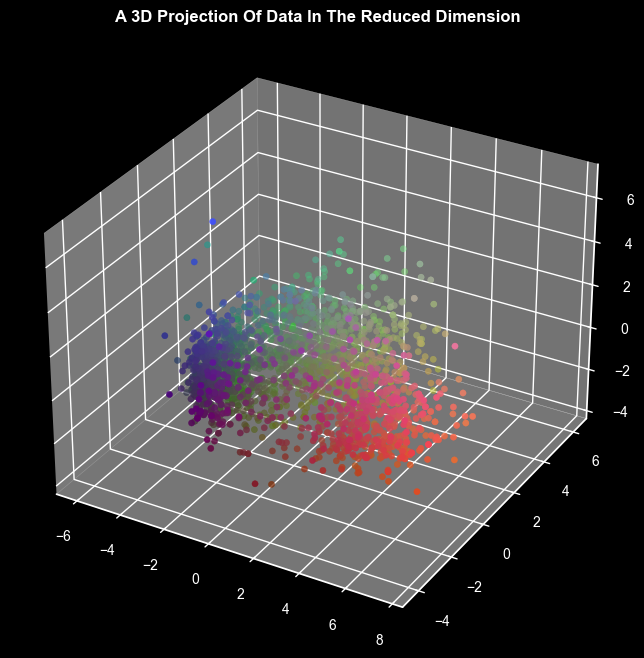

In [76]:
# Creamos una matriz de colores donde cada columna representa un color diferente
colors = np.array([x, y, z]).T
# Para garantizar que los colores sean distintos para cada valor de x, y, z, podemos normalizar los datos
colors = colors - np.min(colors, axis=0)
colors = colors / np.max(colors, axis=0)
# Creamos una figura y ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
# Graficamos los puntos con colores distintos
ax.scatter(x, y, z, c=colors, marker="o")
# Configuramos el título
ax.set_title("A 3D Projection Of Data In The Reduced Dimension", fontsize=12, weight='bold')
# Mostramos la gráfica
plt.show()

<a id="2"></a>
## <p style="background-color:#000000;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">4. DIMENSIONALITY REDUCTION</p>

Elbow Method to determine the number of clusters to be formed:


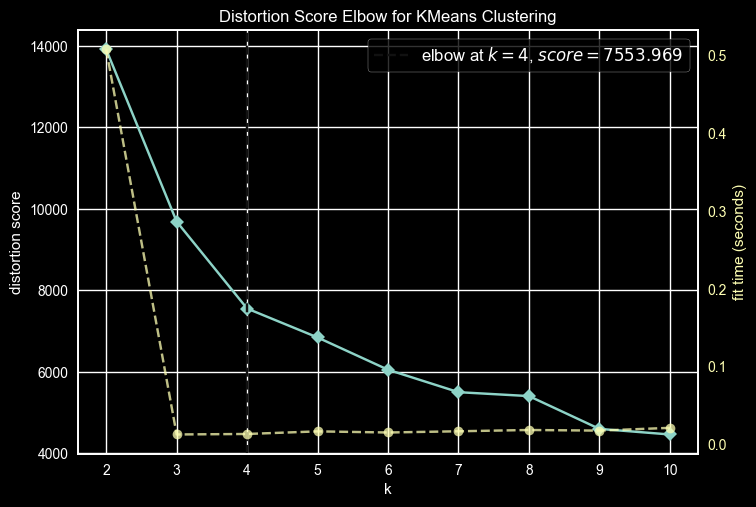

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

In [79]:
df_pca.head()

col1      col2      col3
0  4.986336 -0.161378  2.447112
1 -2.874168  0.022703 -1.530581
2  2.615763 -0.731407 -0.265286
3 -2.654568 -1.455857 -0.398136
4 -0.656015  0.177912 -0.141037

In [80]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(df_pca)
df_pca["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

In [83]:
df['Clusters'].value_counts()

Clusters
0    627
1    598
2    495
3    492
Name: count, dtype: int64

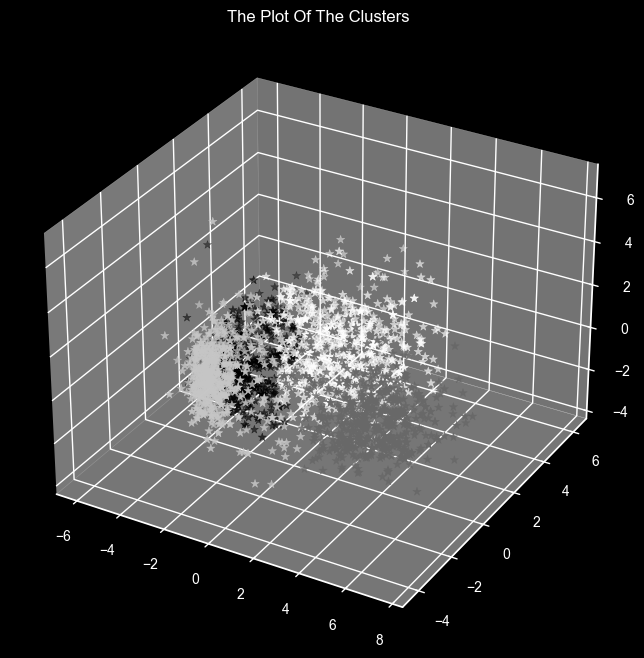

In [87]:
#Plotting the clusters
#marker='o', cmap = colors
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_pca["Clusters"],marker='*')
ax.set_title("The Plot Of The Clusters")
plt.show()


<a id="2"></a>
## <p style="background-color:#000000;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">5. CLUSTERING</p>

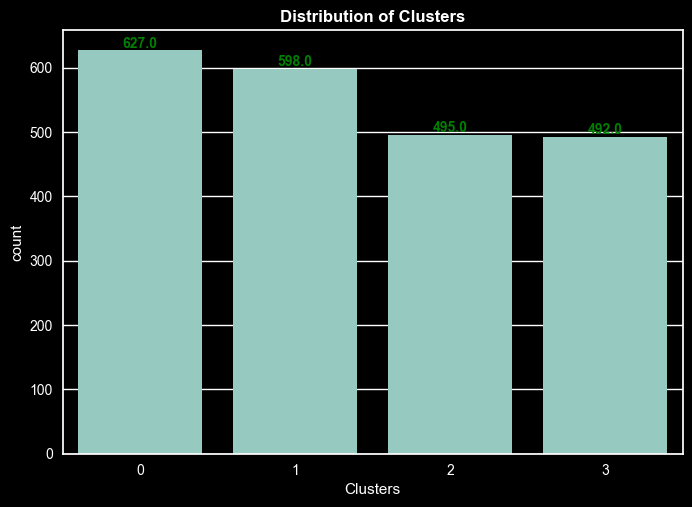

In [89]:
sns.countplot(data=df,x='Clusters')
plt.title('Distribution of Clusters',fontsize=12,weight='bold')
# Agregar etiquetas a las barras
ax = plt.gca()  # Obtener el eje actual
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='green',weight='bold', xytext=(0, 5), 
                textcoords='offset points')
plt.show()

In [90]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent',
       'Clusters'],
      dtype='object')

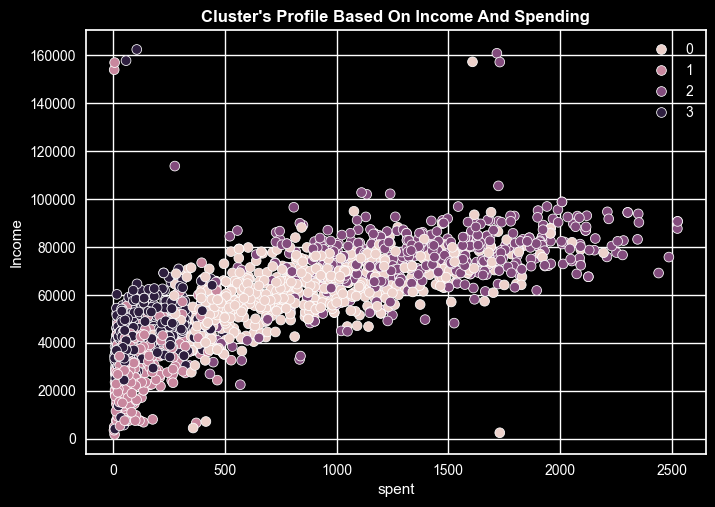

In [93]:
pl = sns.scatterplot(data = df,x=df["spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending",fontsize=12,weight='bold')
plt.legend()
plt.show()

**Income vs spending plot shows the clusters pattern**

1. group 0: high spending & average income
2. group 1: high spending & high income
3. group 2: low spending & low income
4. group 3: high spending & low income

<a id="2"></a>
## <p style="background-color:#000000;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">6. EVALUATING MODELS</p>

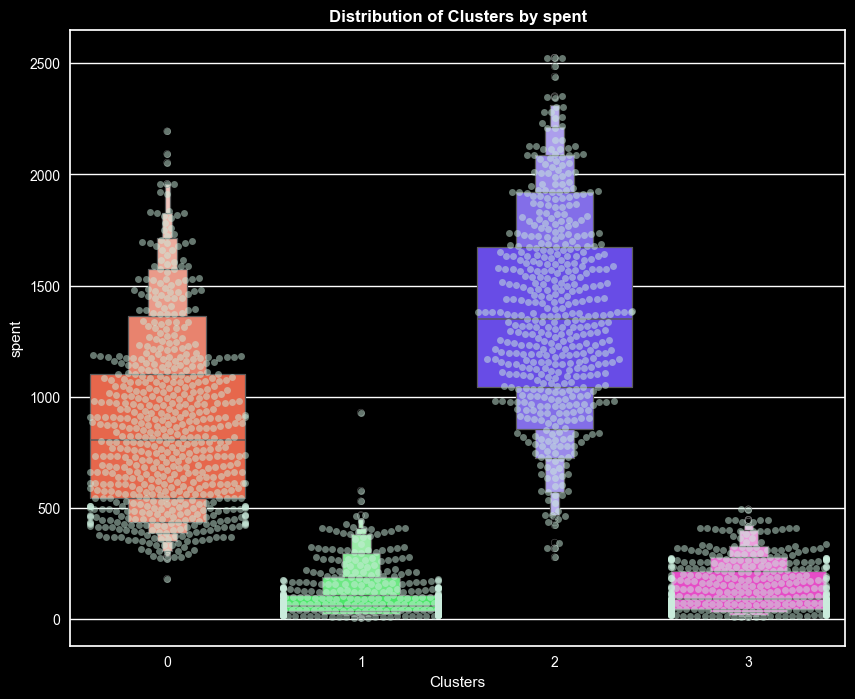

In [99]:
colors_new = ["#FF5733", "#33FF57", "#5733FF", "#FF33D6", "#33D6FF"]
plt.figure(figsize=(10,8))
pl=sns.swarmplot(x=df["Clusters"], y=df["spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df['Clusters'],y=df['spent'],palette=colors_new)
plt.title('Distribution of Clusters by spent',fontsize=12,weight='bold')
plt.show()

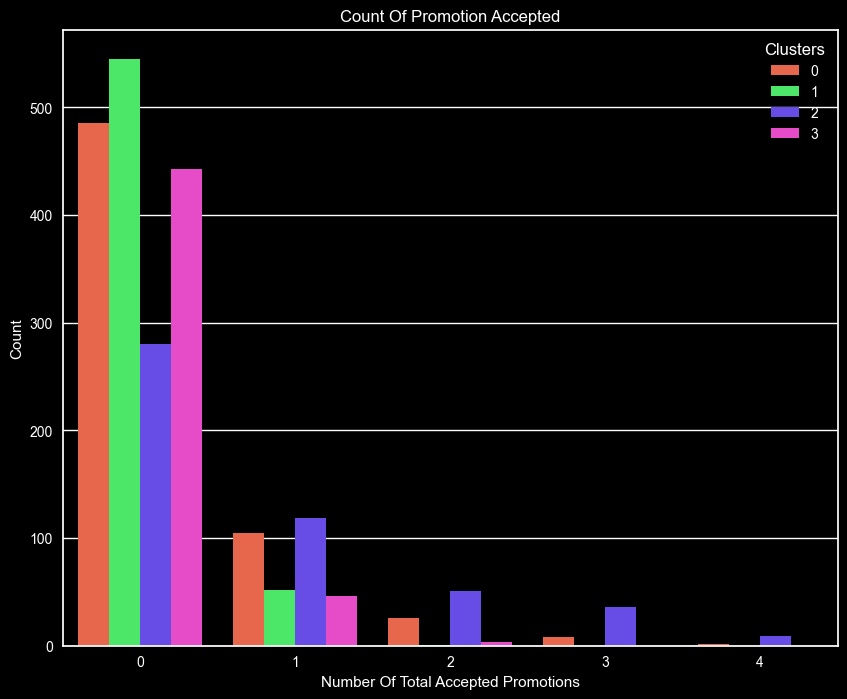

In [111]:
df['Total_Promos']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']
# Creamos el gráfico de barras
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Total_Promos', hue='Clusters', palette=colors_new)

# Configuramos el título y etiquetas de los ejes
plt.title("Count Of Promotion Accepted")
plt.xlabel("Number Of Total Accepted Promotions")
plt.ylabel("Count")
# Mostramos el gráfico
plt.show()

In [122]:
# Creamos el gráfico de barras con Plotly Express
fig = px.histogram(df, x='Total_Promos', color='Clusters', barmode='group', color_discrete_sequence=colors_new,template='seaborn')
# Configuramos el título y etiquetas de los ejes
fig.update_layout(title="Count Of Promotion Accepted",
                  xaxis_title="Number Of Total Accepted Promotions",
                  yaxis_title="Count")
# Configuramos las etiquetas en las barras
for trace in fig.data:
    trace.update(text=trace.y, textposition='outside')
# Mostramos el gráfico
fig.show()


* Hasta ahora no ha habido una respuesta abrumadora a las campañas. Muy pocos participantes en general. 
Además, ninguna parte abarca los 5. Quizás se requieran campañas mejor orientadas y 
mejor planificadas para impulsar las ventas.

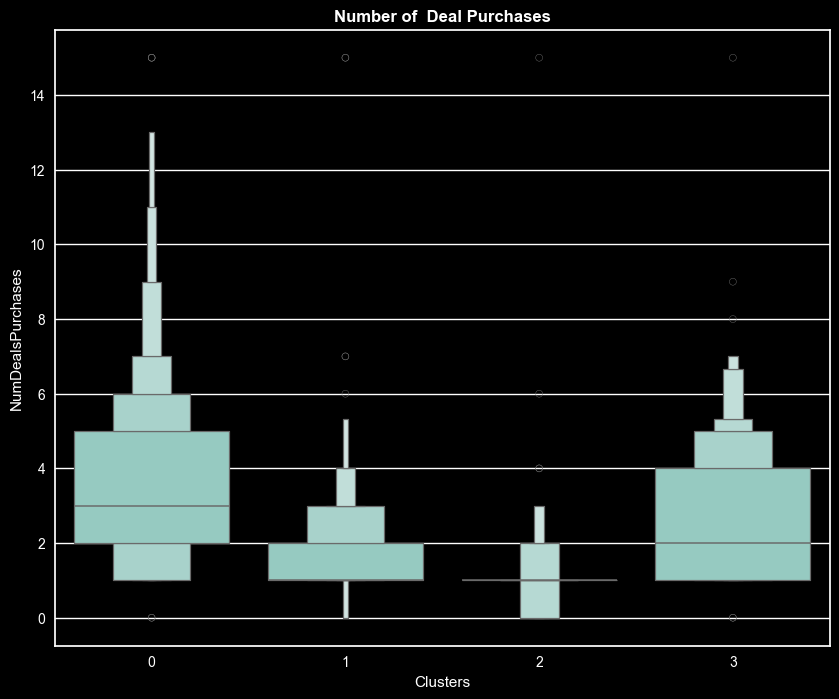

In [126]:
plt.figure(figsize=(10,8))
sns.boxenplot(data=df,x='Clusters',y='NumDealsPurchases')
plt.title('Number of  Deal Purchases',fontsize=12,weight='bold')
plt.show()

* A diferencia de las campañas, las ofertas ofrecidas obtuvieron buenos resultados. Tiene el mejor resultado con el grupo 0 y el grupo 3. Sin embargo, nuestros clientes estrella del grupo 1 no están muy interesados en las ofertas. Nada parece atraer abrumadoramente al grupo 2

<a id="2"></a>
## <p style="background-color:#000000;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">7. PROFILING</p>

In [127]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]
df[Personal].head()

Kidhome  Teenhome Customer_For  Age  Children  Family_Size  Is_Parent  \
0        0         0     663 days   67         0            1          0   
1        1         1     113 days   70         2            3          1   
2        0         0     312 days   59         0            2          0   
3        1         0     139 days   40         1            3          1   
4        1         0     161 days   43         1            3          1   

   Education  Living_With  
0          0            0  
1          0            0  
2          0            1  
3          0            1  
4          1            1

In [130]:
df['Customer_For'] = pd.to_timedelta(df['Customer_For'])
# Extraer el número de días como un número entero
df['Customer_For'] = df['Customer_For'].dt.days
df['Customer_For'].info()

<class 'pandas.core.series.Series'>
Index: 2212 entries, 0 to 2239
Series name: Customer_For
Non-Null Count  Dtype
--------------  -----
2212 non-null   int64
dtypes: int64(1)
memory usage: 34.6 KB


<Figure size 800x600 with 0 Axes>

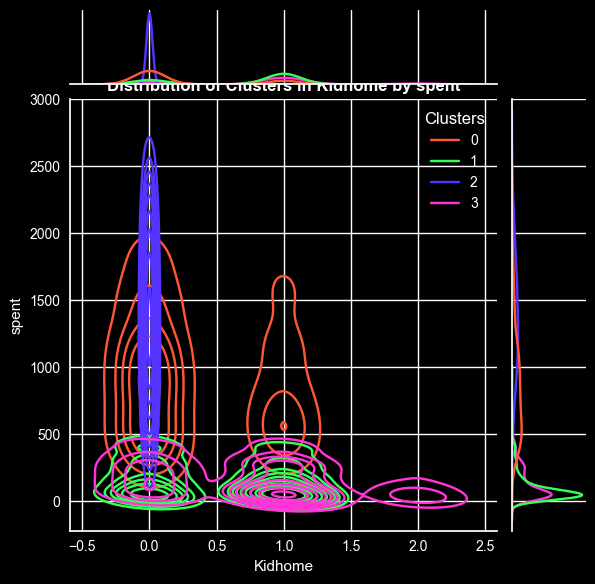

<Figure size 800x600 with 0 Axes>

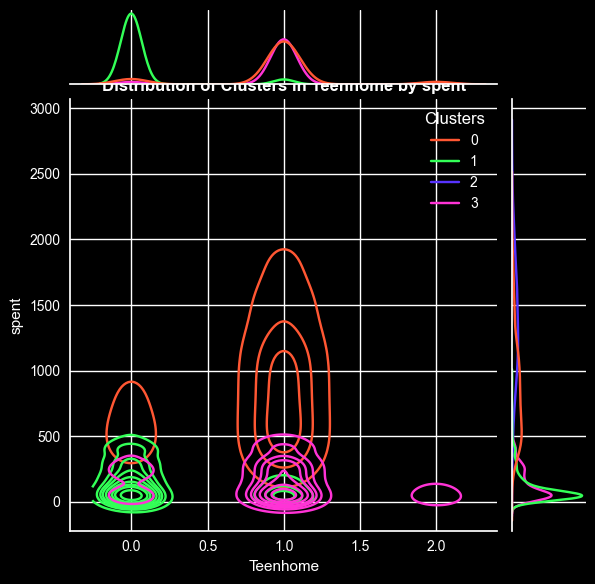

<Figure size 800x600 with 0 Axes>

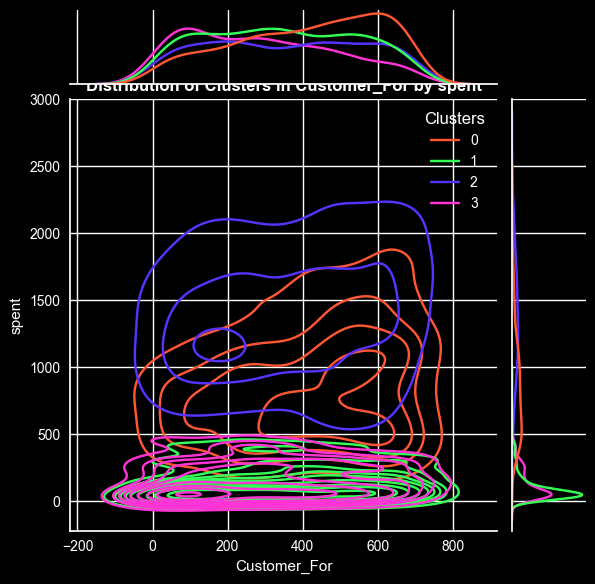

<Figure size 800x600 with 0 Axes>

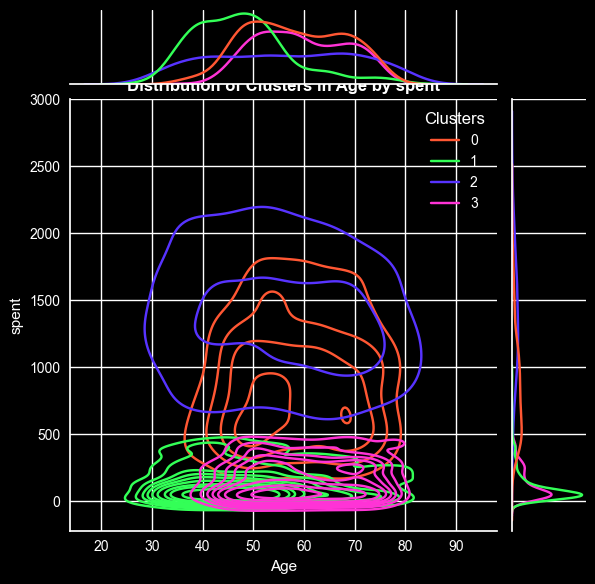

<Figure size 800x600 with 0 Axes>

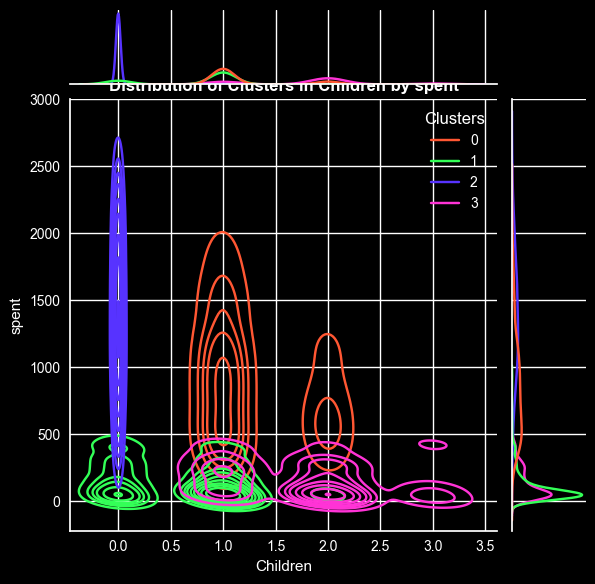

<Figure size 800x600 with 0 Axes>

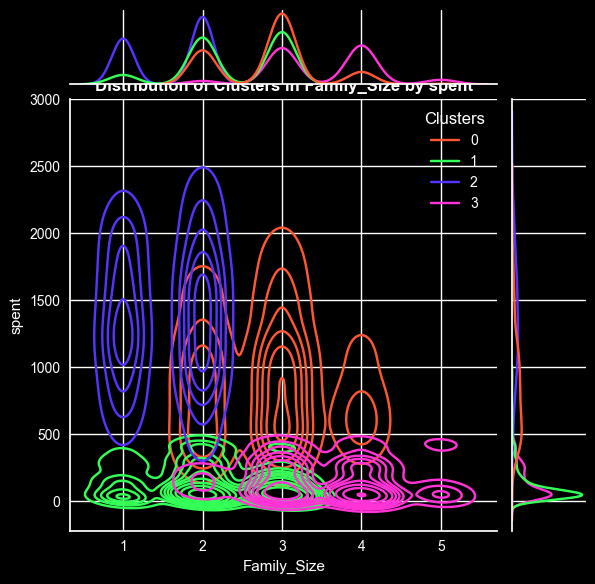

<Figure size 800x600 with 0 Axes>

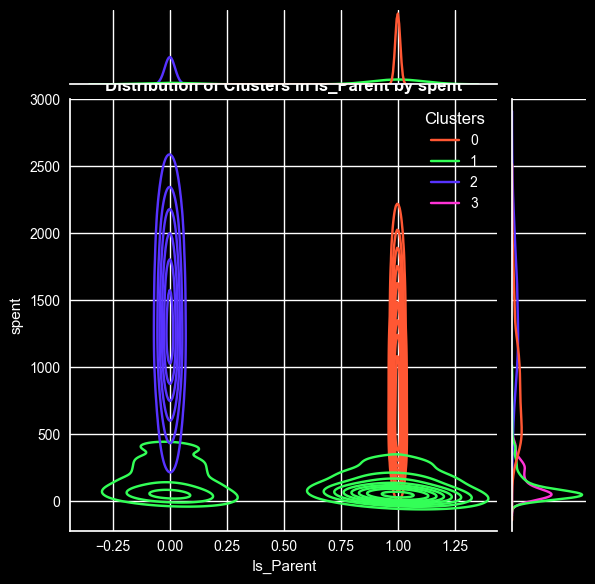

<Figure size 800x600 with 0 Axes>

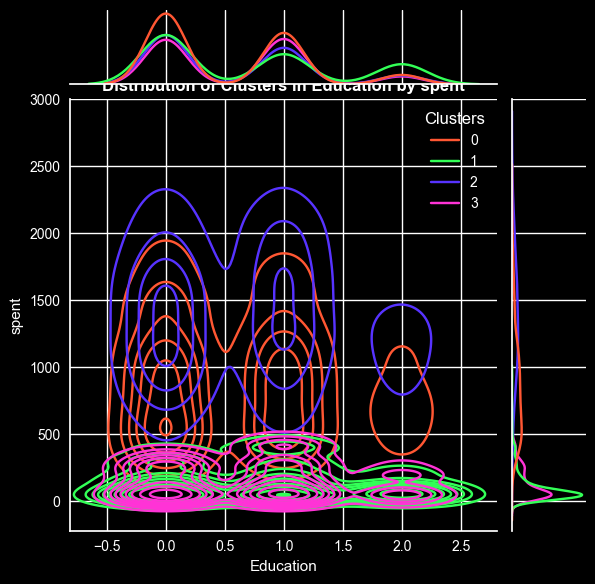

<Figure size 800x600 with 0 Axes>

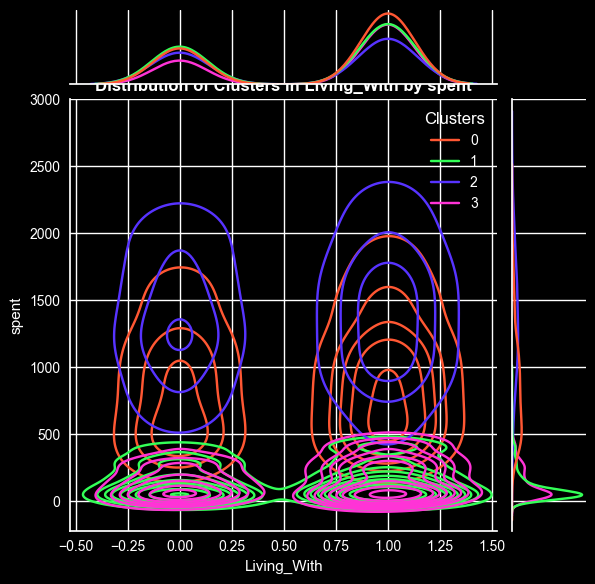

In [145]:
for i in Personal:
    plt.figure(figsize=(8,6))
    sns.jointplot(data=df,x=i,y='spent',hue='Clusters',kind='kde',palette=colors_new)
    plt.title(f'Distribution of Clusters in {i} by spent',fontsize=12,weight='bold')
    plt.show()

<a id="2"></a>
## <p style="background-color:#000000;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">8. Conclusion</p>

* En este proyecto, implementé un análisis de agrupación no supervisada mediante la técnica de reducción de dimensionalidad seguida de agrupación aglomerativa. Llegué a la identificación de 4 clústeres, que posteriormente empleé para segmentar a los clientes según sus perfiles familiares e ingresos.